In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
%matplotlib inline

In [2]:
start = "2020-09-05"

# STRATEGY-Simple MA crossover strategy

## Making a dynamic sma crossover backtester and optimizer class

## 2 year train data 1 year test data

### i couldn't get the hourly data via yfinance, hence getting the data from binance api

In [3]:
from binance.client import Client

In [4]:
api_key = "bT3JgDAiGkPkIDzVAGNXvRrLU5PePQz0kNz2Gtt8NFAatjfOOIiVoiMhjOk4t9RL"
secret_api_key = "IdrL486SQzb5QB5ruuakUZZdKwgTNGGEzM1VHQ6QPDSpZawrGCemjV1LNfOYCjWj"

In [5]:
client = Client(api_key=api_key, api_secret=secret_api_key, tld="com")

In [6]:
timestamp = client._get_earliest_valid_timestamp(symbol="BTCUSDT", interval="1h")

In [7]:
pd.to_datetime(timestamp, unit="ms")

Timestamp('2017-08-17 04:00:00')

In [143]:
binance_df = client.get_historical_klines(symbol="BTCUSDT", start_str=timestamp, interval="1d")
binance_df

[[1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '0'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '0'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '0'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999,
  '2797231.71402728',
  3972,
  '557.35610700',
  '2255662.55315837',
  '0'],
 [1503360000000,
  '4016.00000000',
  '4104.82000000',
  '3400.00000000',
  '4040.00000000',
  '966.68485800',
  1503446399999,
  '3752505.77214051',
  6494,
  '423.99518100',

In [144]:
binance_df = pd.DataFrame(binance_df)

In [145]:
binance_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
1,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
2,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
3,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0
4,1503360000000,4016.00000000,4104.82000000,3400.00000000,4040.00000000,966.68485800,1503446399999,3752505.77214051,6494,423.99518100,1637188.36934226,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1841,1662076800000,20132.64000000,20441.26000000,19755.29000000,19951.86000000,245986.60330000,1662163199999,4946889819.51483640,5740705,122616.90745000,2466027768.59865370,0
1842,1662163200000,19950.98000000,20055.93000000,19652.72000000,19831.90000000,146639.03204000,1662249599999,2908816275.01028630,3739909,72556.83777000,1439326777.58573770,0
1843,1662249600000,19832.45000000,20029.23000000,19583.10000000,20000.30000000,145588.77893000,1662335999999,2883227667.19619230,3838915,72789.26129000,1441735599.54761430,0
1844,1662336000000,20000.30000000,20057.27000000,19633.83000000,19796.84000000,222543.01057000,1662422399999,4404971191.90702630,4657233,110786.05423000,2193009371.51916640,0


In [146]:
list(range(6,12,1))

[6, 7, 8, 9, 10, 11]

In [147]:
binance_df.drop(list(range(6,12,1)), axis=1, inplace=True)
binance_df

,0,1,2,3,4,5
0,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400
1,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300
2,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200
3,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000
4,1503360000000,4016.00000000,4104.82000000,3400.00000000,4040.00000000,966.68485800
...,...,...,...,...,...,...
1841,1662076800000,20132.64000000,20441.26000000,19755.29000000,19951.86000000,245986.60330000
1842,1662163200000,19950.98000000,20055.93000000,19652.72000000,19831.90000000,146639.03204000
1843,1662249600000,19832.45000000,20029.23000000,19583.10000000,20000.30000000,145588.77893000
1844,1662336000000,20000.30000000,20057.27000000,19633.83000000,19796.84000000,222543.01057000


In [148]:
column_names = ["date","open", "high","low","close","volume"]
binance_df.columns = column_names
binance_df

,date,open,high,low,close,volume
0,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400
1,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300
2,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200
3,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000
4,1503360000000,4016.00000000,4104.82000000,3400.00000000,4040.00000000,966.68485800
...,...,...,...,...,...,...
1841,1662076800000,20132.64000000,20441.26000000,19755.29000000,19951.86000000,245986.60330000
1842,1662163200000,19950.98000000,20055.93000000,19652.72000000,19831.90000000,146639.03204000
1843,1662249600000,19832.45000000,20029.23000000,19583.10000000,20000.30000000,145588.77893000
1844,1662336000000,20000.30000000,20057.27000000,19633.83000000,19796.84000000,222543.01057000


In [149]:
binance_df["date"] = pd.to_datetime(binance_df["date"], unit="ms")
binance_df

,date,open,high,low,close,volume
0,2017-08-18,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400
1,2017-08-19,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300
2,2017-08-20,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200
3,2017-08-21,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000
4,2017-08-22,4016.00000000,4104.82000000,3400.00000000,4040.00000000,966.68485800
...,...,...,...,...,...,...
1841,2022-09-02,20132.64000000,20441.26000000,19755.29000000,19951.86000000,245986.60330000
1842,2022-09-03,19950.98000000,20055.93000000,19652.72000000,19831.90000000,146639.03204000
1843,2022-09-04,19832.45000000,20029.23000000,19583.10000000,20000.30000000,145588.77893000
1844,2022-09-05,20000.30000000,20057.27000000,19633.83000000,19796.84000000,222543.01057000


In [153]:
binance_df.set_index("date", inplace=True)

In [154]:
train_start = "2018-09-05"
train_end = "2021-09-05"

test_start = "2021-09-05"
test_end = "2022-09-05"

In [155]:
df_train = binance_df.loc[train_start:train_end].copy()
df_train

,open,high,low,close,volume
date,,,,,
2018-09-05,7359.05000000,7397.30000000,6682.00000000,6700.00000000,63715.25626700
2018-09-06,6697.27000000,6725.00000000,6265.00000000,6516.01000000,60644.46422700
2018-09-07,6516.84000000,6544.00000000,6320.00000000,6395.54000000,38906.28805000
2018-09-08,6395.54000000,6478.00000000,6111.00000000,6185.05000000,38215.03217100
2018-09-09,6185.06000000,6441.00000000,6141.53000000,6250.81000000,37053.92382000
...,...,...,...,...,...
2021-09-01,47100.89000000,49156.00000000,46512.00000000,48810.52000000,49904.65528000
2021-09-02,48810.51000000,50450.13000000,48584.06000000,49246.64000000,54410.77053800
2021-09-03,49246.63000000,51000.00000000,48316.84000000,49999.14000000,59025.64415700


# Class Implementation

In [328]:
def sma_backtester(data, fastma, slowma, start=None, end=None):
    close = pd.to_numeric(data["close"]).to_frame().copy()
    
    close["returns"] = np.log(close.close.pct_change() + 1)
    close["slowma"] = close.close.rolling(window=slowma).mean()
    close["fastma"] = close.close.rolling(window=fastma).mean()
    close["position"] = 0
    
    conditionLong = close.fastma > close.slowma
    conditionShort = close.fastma < close.slowma
    
    close.loc[conditionLong, "position"] = 1
    close.loc[conditionShort, "position"] = -1
    
    transaction_costs = 0.001 + 0.0002 #binance fee + slippage
    close["trades"] = close.position.diff(1)
    close.loc[close.trades != 0, "trades"] = 1
    close["strategy_returns_commissions_included"] = close.position.shift(1) * (close.returns - (close.trades.shift() * 2 * (transaction_costs + (close.returns * transaction_costs) / 100)))
    
    return close

In [321]:
prepared_data = sma_backtester(df_train, 20, 50)

# daily chart 20-50 crossover strategy

<AxesSubplot:xlabel='date'>

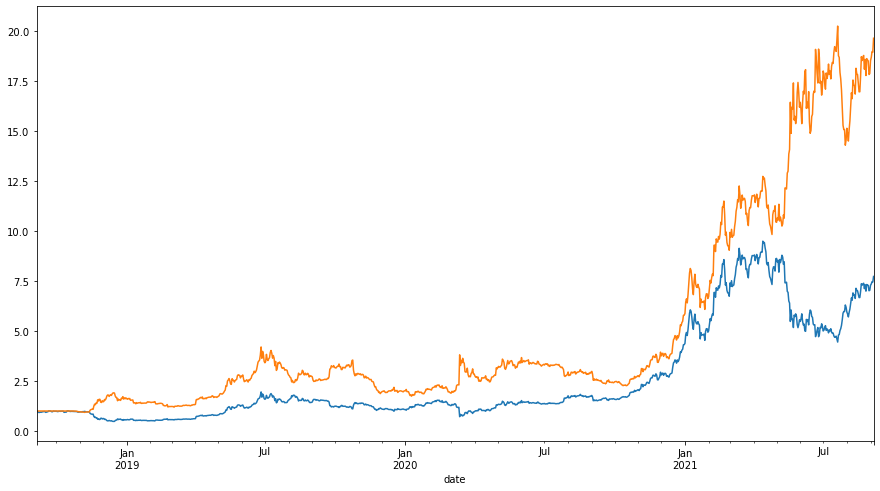

In [185]:
np.exp(prepared_data.returns.cumsum()).plot(figsize=(15,8))
np.exp(prepared_data.strategy_returns_commissions_included.cumsum()).plot()

# Hourly chart 20-50 crossover strategy

In [329]:
def binance_get_earliest_historical(symbol, earliest_timestamp, interval="1d", start=None, end=None):
    binance_df = client.get_historical_klines(symbol=symbol, start_str=timestamp, interval=interval)
    binance_df = pd.DataFrame(binance_df)
    binance_df.drop(list(range(6,12,1)), axis=1, inplace=True)
    column_names = ["date","open", "high","low","close","volume"]
    binance_df.columns = column_names
    binance_df["date"] = pd.to_datetime(binance_df["date"], unit="ms")
    binance_df.set_index("date", inplace=True)
    data = binance_df.loc[start:end].copy()
    return data

In [330]:
data = binance_get_earliest_historical("BTCUSDT", timestamp, interval="1h",
                                       start=train_start,end=train_end)
data

,open,high,low,close,volume
date,,,,,
2018-09-05 00:00:00,7359.05000000,7379.00000000,7355.00000000,7379.00000000,1613.70749000
2018-09-05 01:00:00,7379.00000000,7394.98000000,7367.01000000,7386.46000000,1404.25242100
2018-09-05 02:00:00,7386.45000000,7388.64000000,7370.00000000,7375.00000000,1274.86769800
2018-09-05 03:00:00,7373.02000000,7381.80000000,7359.00000000,7379.33000000,1006.62296800
2018-09-05 04:00:00,7379.17000000,7382.86000000,7359.00000000,7367.19000000,1261.27713100
...,...,...,...,...,...
2021-09-05 19:00:00,50355.01000000,50875.08000000,50355.00000000,50684.56000000,2532.79532000
2021-09-05 20:00:00,50684.56000000,51684.85000000,50636.10000000,51636.29000000,3976.49752900
2021-09-05 21:00:00,51636.28000000,51828.00000000,51452.21000000,51700.00000000,3255.82406700


In [335]:
prepared_data_1h = sma_backtester(data, 10, 50)

In [336]:
prepared_data_1h

,close,returns,slowma,fastma,position,trades,strategy_returns_commissions_included
date,,,,,,,
2018-09-05 00:00:00,7379.00,NaN,NaN,NaN,0,1.0,NaN
2018-09-05 01:00:00,7386.46,0.001010,NaN,NaN,0,0.0,-0.000000
2018-09-05 02:00:00,7375.00,-0.001553,NaN,NaN,0,0.0,-0.000000
2018-09-05 03:00:00,7379.33,0.000587,NaN,NaN,0,0.0,0.000000
2018-09-05 04:00:00,7367.19,-0.001646,NaN,NaN,0,0.0,-0.000000
...,...,...,...,...,...,...,...
2021-09-05 19:00:00,50684.56,0.006523,50091.9136,50264.232,1,0.0,0.006523
2021-09-05 20:00:00,51636.29,0.018603,50115.4636,50427.863,1,0.0,0.018603
2021-09-05 21:00:00,51700.00,0.001233,50138.8938,50577.985,1,0.0,0.001233


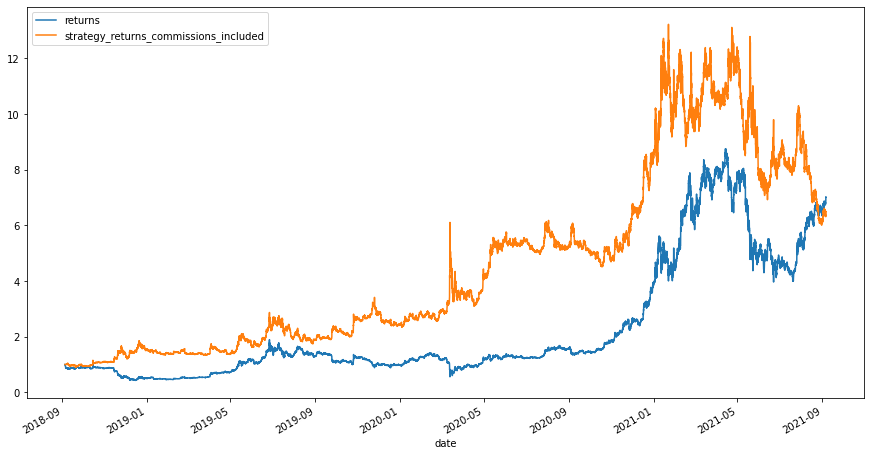

In [338]:
np.exp(prepared_data_1h.returns.cumsum()).plot(figsize=(15,8))
np.exp(prepared_data_1h.strategy_returns_commissions_included.cumsum()).plot()
plt.legend()

In [339]:
ann_mu = prepared_data_1h["strategy_returns_commissions_included"].mean() * 365.25
ann_std = prepared_data_1h["strategy_returns_commissions_included"].std() * np.sqrt(365.25)
ann_mu, ann_std, ann_mu/ ann_std

(0.02601785782528702, 0.15780705293055622, 0.16487132445681188)

In [190]:
prepared_data_test_1h = binance_get_earliest_historical("BTCUSDT", timestamp,
                                                        interval="1h",start=test_start)
prepared_data_test_1h

,open,high,low,close,volume
date,,,,,
2021-09-05 00:00:00,49917.54000000,50240.00000000,49777.00000000,50164.99000000,1738.20967000
2021-09-05 01:00:00,50164.99000000,50193.39000000,49903.96000000,50099.34000000,1018.99401000
2021-09-05 02:00:00,50099.33000000,50299.31000000,50050.79000000,50090.00000000,1147.34354000
2021-09-05 03:00:00,50090.00000000,50128.58000000,49657.14000000,49663.21000000,1509.95853000
2021-09-05 04:00:00,49663.22000000,49890.36000000,49640.00000000,49834.99000000,772.32400000
...,...,...,...,...,...
2022-09-06 12:00:00,19918.33000000,19993.67000000,19846.39000000,19854.93000000,13998.78785000
2022-09-06 13:00:00,19852.88000000,19908.73000000,19710.00000000,19781.57000000,17262.90628000
2022-09-06 14:00:00,19780.65000000,19864.75000000,19663.70000000,19838.81000000,21170.98111000


In [374]:
prepared_data_test_1h = sma_backtester(prepared_data_test_1h, 100 , 400)

<AxesSubplot:xlabel='date'>

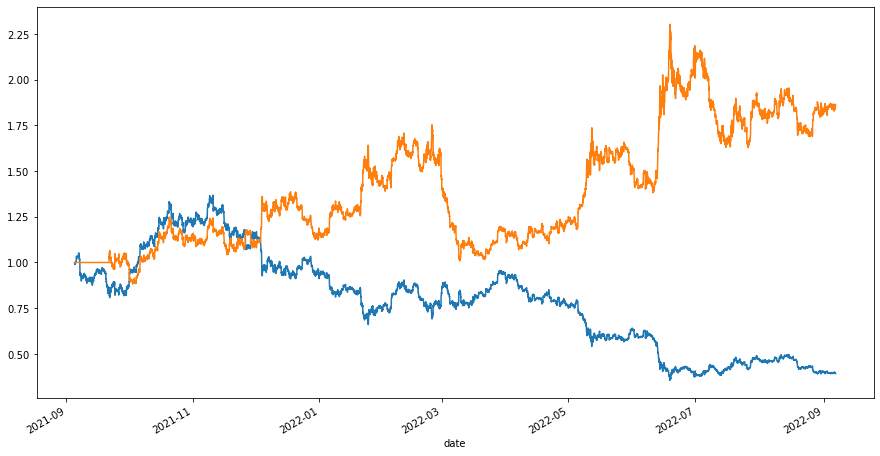

In [375]:
np.exp(prepared_data_test_1h.returns.cumsum()).plot(figsize=(15,8))
np.exp(prepared_data_test_1h.strategy_returns_commissions_included.cumsum()).plot()

In [376]:
prepared_data_test_1h["strategy_returns_commissions_included"].mean() * 365.25

0.025851042639999388

In [377]:
ann_mu = prepared_data_test_1h["strategy_returns_commissions_included"].mean() * 365.25
ann_std = prepared_data_test_1h["strategy_returns_commissions_included"].std() * np.sqrt(365.25)
ann_mu, ann_std, ann_mu/ ann_std

(0.025851042639999388, 0.13434626535133393, 0.19242099936604387)

# Strategy Backtester Class

In [352]:
class backtest_strategy():
    def __init__(self, client, symbol, train_start, train_end,
                 test_start, test_end, fastsma, slowsma, interval="1d", data_source=None):
        self.data_source = data_source
        self.symbol = symbol
        self.train_start = str(train_start)
        self.train_end = str(train_end)
        self.test_start = str(test_start)
        self.test_end = str(test_end)
        self.fastsma = fastsma
        self.slowsma = slowsma
        self.interval = interval
        self.client = client
    def get_candles(self):
        earliest_timestamp = self.client._get_earliest_valid_timestamp(symbol=self.symbol,
                                                                      interval=self.interval)
        earliest_timestamp = pd.to_datetime(earliest_timestamp, unit="ms")
        self.raw = client.get_historical_klines(symbol=self.symbol, interval=self.interval,
                                                 start_str=str(earliest_timestamp))
        self.raw = pd.DataFrame(self.raw)
        self.raw.drop(list(range(6,12,1)), axis=1, inplace=True)
        column_names = ["date","open", "high","low","close","volume"]
        self.raw.columns = column_names
        self.raw["date"] = pd.to_datetime(self.raw["date"], unit="ms")
        self.raw.set_index("date", inplace=True)
        self.train_data = self.raw.loc[self.train_start:self.train_end].copy()
        self.test_data = self.raw.loc[self.test_start:self.test_end].copy()
    def strategy(self):
        from itertools import product
        #-----------------------------STRATEGY FIELD  (DYNAMIC)------------------------------------
        close = pd.to_numeric(self.train_data["close"]).to_frame().copy()
        
        close["returns"] = np.log(close.close.pct_change() + 1)
        combinations = product(self.fastsma,self.slowsma)
        self.sharpe_of_combinations = []
        for comb in combinations:
            close["slowma"] = close.close.rolling(window=comb[1]).mean()
            close["fastma"] = close.close.rolling(window=comb[0]).mean()
            close["position"] = 0

            conditionLong = close.fastma > close.slowma
            conditionShort = close.fastma < close.slowma

            close.loc[conditionLong, "position"] = 1
            close.loc[conditionShort, "position"] = -1

            transaction_costs = 0.001 + 0.0002 #binance fee + slippage
            close["trades"] = close.position.diff(1)
            close.loc[close.trades != 0, "trades"] = 1
            close["strategy_returns_commissions_included"] = close.position.shift(1) * (close.returns - (close.trades.shift() * 2 * (transaction_costs + (close.returns * transaction_costs) / 100)))
            self.sharpe_of_combinations.append(self.evaluate(close, comb))
        #------------------------------------------------------------------------------------------
    def evaluate(self, prepared_data, combination):
        trading_days = 365.25
        strategy_ann_mu = prepared_data.strategy_returns_commissions_included.mean() * trading_days
        strategy_ann_std = prepared_data.strategy_returns_commissions_included.std() * np.sqrt(trading_days)
        sharpe_ratio = strategy_ann_mu / strategy_ann_std
        print(strategy_ann_mu, strategy_ann_std, sharpe_ratio)
        return list(list(combination) + [sharpe_ratio])
    def report(self):
        report_df = pd.DataFrame(columns=["slowsma", "fastsma", "sharpe"])
        for sharpe_n_combination in self.sharpe_of_combinations:
            report_df.loc[len(report_df)] = sharpe_n_combination
        print(report_df)
        return report_df

In [353]:
train_start = "2018-09-05"
train_end = "2021-09-05"

test_start = "2021-09-05"
test_end = "2022-09-05"

In [354]:
backtest_object = backtest_strategy(client, symbol="BTCUSDT", train_start=train_start,
                                   train_end=train_end, test_start=test_start, test_end=test_end,
                                   fastsma=(10,20,50,100), slowsma=(50,100,200,250,400),
                                   interval="1h")

In [355]:
backtest_object.get_candles()

In [356]:
backtest_object.strategy()

0.02601785782528702 0.15780705293055622 0.16487132445681188
0.041710037059185266 0.1575958774653547 0.2646645187045242
0.033337520155228555 0.15754059255743297 0.21161225569895603
0.02295598581085705 0.15750055194948043 0.14575178008404926
0.0271936390402824 0.15725813413295875 0.1729235768325389
0.029217904539059338 0.1578248477159644 0.18512867246127476
0.03324711726814133 0.15762586015469163 0.21092425592801278
0.03095293462198078 0.15748647819346034 0.19654344282153174
0.024839536022767967 0.15744438473698583 0.15776704938866468
0.022080507646022932 0.157259436439988 0.14040815702941367
0.0 0.0 nan
0.016591672389344638 0.15767411789714494 0.10522762144239697
0.019734361880433975 0.15750271030131707 0.1252953796330256
0.02119838693732897 0.1574356523527323 0.13464794422698037
0.023623324142950573 0.1572186043908055 0.1502578160802712
-0.016591672389344638 0.15767411789714494 -0.10522762144239697
0.0 0.0 nan
0.019084721854582366 0.15750228098048327 0.12117108232195843
0.0209040709944

C:\Users\mertk\AppData\Local\Temp\ipykernel_4376\3304571186.py:57: RuntimeWarning: invalid value encountered in double_scalars
  sharpe_ratio = strategy_ann_mu / strategy_ann_std


In [357]:
backtest_object.report()

    slowsma  fastsma    sharpe
0      10.0     50.0  0.164871
1      10.0    100.0  0.264665
2      10.0    200.0  0.211612
3      10.0    250.0  0.145752
4      10.0    400.0  0.172924
5      20.0     50.0  0.185129
6      20.0    100.0  0.210924
7      20.0    200.0  0.196543
8      20.0    250.0  0.157767
9      20.0    400.0  0.140408
10     50.0     50.0       NaN
11     50.0    100.0  0.105228
12     50.0    200.0  0.125295
13     50.0    250.0  0.134648
14     50.0    400.0  0.150258
15    100.0     50.0 -0.105228
16    100.0    100.0       NaN
17    100.0    200.0  0.121171
18    100.0    250.0  0.132778
19    100.0    400.0  0.167299


,slowsma,fastsma,sharpe
0,10.0,50.0,0.164871
1,10.0,100.0,0.264665
2,10.0,200.0,0.211612
3,10.0,250.0,0.145752
4,10.0,400.0,0.172924
5,20.0,50.0,0.185129
6,20.0,100.0,0.210924
7,20.0,200.0,0.196543
8,20.0,250.0,0.157767
9,20.0,400.0,0.140408
